Import Data and packages

In [ ]:
import pandas as pd
import pylab as pl
import shapely
import json
import sklearn
import numpy as np


%pylab inline

Populating the interactive namespace from numpy and matplotlib


# LOAD DATA

In [ ]:
NCS = pd.read_csv('https://raw.githubusercontent.com/rameyamey/MLApplications/master/RandomForestSTEMAP/NCS/NCSUDVisit10_22_braindataRFcut2.csv')

# REPLACE EMPTY CELLS IN A UNIFORM FASHION

In [ ]:
NCS = NCS.replace([np.inf, -np.inf], np.nan)

# CHECK DATA VALUES AND EXTRACT VARIABLE NAMES

In [ ]:
NCS.head()


,SubjectID,Gender,ZNBackAverage,ZTD1,ZTD2,ZSTEMAV2,ZNONSTEMAV2,ZDcorrect_Included,ZDwrong_Included,Zmathdevalue,ZGRIT_SCORE,Zcoratmpt,ZStigmaConsciousnessScore,ZMoodComp,ZSAQ1,ZWrongFeedback_Arousal_emotion_SelectedModularity_Theta,ZWrongFeedback_Arousal_emotion_SelectedModularity_Beta,ZWrongFeedback_Arousal_emotion_SelectedModularity_Gamma,ZWrongFeedback_DPD1_SelectedModularity_Theta,ZWrongFeedback_DPD1_SelectedModularity_Beta,ZWrongFeedback_DPD1_SelectedModularity_Gamma,ZSTEMGradeAll
0,11112.0,1,-0.02071,-0.45069,0.33604,-1.10578,-0.94416,-0.01954,0.21339,1.43174,-0.33093,-0.47257,-0.18360,1.92660,0.76471,-1.59545,-0.20304,1.54023,-0.24263,0.98675,0.83225,1.00824
1,11116.0,1,0.47848,0.89040,0.33604,3.01079,3.26425,-1.98186,0.78259,-0.50861,-1.07065,-0.26493,0.07405,-0.32166,-3.97650,0.14548,0.12107,-0.38711,0.89513,1.52491,1.42755,NaN
2,11118.0,1,-0.02071,-0.45069,-0.24963,-0.52816,-0.35028,-2.35260,-1.49794,1.07895,-0.33093,1.50690,0.07405,0.92737,-1.26724,0.73572,-0.55960,-1.55390,0.49305,0.13665,0.04191,NaN
3,11120.0,1,0.60328,0.21985,0.33604,0.28861,0.31645,-0.49576,0.18444,0.37337,0.40879,NaN,0.20288,-1.15435,0.76471,1.22003,-0.51622,-1.03564,0.56888,1.08507,1.47981,1.46226
4,11122.0,1,-0.39510,0.21985,-0.24963,0.80411,1.60164,0.54591,0.67826,0.72616,0.40879,2.72503,-1.98718,0.09468,-0.58992,0.07510,-0.38753,0.38731,0.17853,0.75849,0.01757,-0.98945


In [ ]:
NCS.tail()


,SubjectID,Gender,ZNBackAverage,ZTD1,ZTD2,ZSTEMAV2,ZNONSTEMAV2,ZDcorrect_Included,ZDwrong_Included,Zmathdevalue,ZGRIT_SCORE,Zcoratmpt,ZStigmaConsciousnessScore,ZMoodComp,ZSAQ1,ZWrongFeedback_Arousal_emotion_SelectedModularity_Theta,ZWrongFeedback_Arousal_emotion_SelectedModularity_Beta,ZWrongFeedback_Arousal_emotion_SelectedModularity_Gamma,ZWrongFeedback_DPD1_SelectedModularity_Theta,ZWrongFeedback_DPD1_SelectedModularity_Beta,ZWrongFeedback_DPD1_SelectedModularity_Gamma,ZSTEMGradeAll
87,55598.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.71704
88,101010.0,2,0.22889,0.89040,0.92172,-0.25481,-0.39539,NaN,NaN,-1.21418,-0.70079,-0.92937,0.46053,1.13555,0.08740,-2.23412,0.08852,-1.58672,0.69813,-0.10091,0.94165,-0.17221
89,111352.0,2,NaN,-0.45069,-1.42099,NaN,NaN,NaN,NaN,-0.33221,0.03893,-0.01577,-1.34305,1.34372,-0.58992,NaN,NaN,NaN,NaN,NaN,NaN,0.19100
90,111372.0,2,NaN,-0.45069,-0.83531,NaN,NaN,NaN,NaN,0.54976,-0.33093,-0.92937,1.61998,2.59275,-1.26724,-1.63429,-0.90713,-0.60894,-0.02749,0.14473,-0.19681,-2.71473
91,555613.0,2,-0.64469,0.21985,1.50740,0.33405,-0.06649,0.5294,0.30427,-1.39058,-0.70079,-0.92937,-1.47188,-0.11349,0.08740,NaN,NaN,NaN,NaN,NaN,NaN,0.19100


In [ ]:
NCS.columns

Index(['SubjectID', 'Gender', 'ZNBackAverage', 'ZTD1', 'ZTD2', 'ZSTEMAV2',
       'ZNONSTEMAV2', 'ZDcorrect_Included', 'ZDwrong_Included', 'Zmathdevalue',
       'ZGRIT_SCORE', 'Zcoratmpt', 'ZStigmaConsciousnessScore', 'ZMoodComp',
       'ZSAQ1', 'ZWrongFeedback_Arousal_emotion_SelectedModularity_Theta',
       'ZWrongFeedback_Arousal_emotion_SelectedModularity_Beta',
       'ZWrongFeedback_Arousal_emotion_SelectedModularity_Gamma',
       'ZWrongFeedback_DPD1_SelectedModularity_Theta',
       'ZWrongFeedback_DPD1_SelectedModularity_Beta',
       'ZWrongFeedback_DPD1_SelectedModularity_Gamma', 'ZSTEMGradeAll'],
      dtype='object')

# REPLACE MISSING VALUES USING KNN TECHNIQUE

[More info about this replacement method here](https://towardsdatascience.com/the-use-of-knn-for-missing-values-cf33d935c637)

In [ ]:
from sklearn.impute import KNNImputer
imputerNCS = KNNImputer(n_neighbors=2)
imputerNCS.fit_transform(NCS)

array([[ 1.111200e+04,  1.000000e+00, -2.071000e-02, ...,  9.867500e-01,
         8.322500e-01,  1.008240e+00],
       [ 1.111600e+04,  1.000000e+00,  4.784800e-01, ...,  1.524910e+00,
         1.427550e+00,  1.099040e+00],
       [ 1.111800e+04,  1.000000e+00, -2.071000e-02, ...,  1.366500e-01,
         4.191000e-02,  1.189845e+00],
       ...,
       [ 1.113520e+05,  2.000000e+00,  1.040900e-01, ...,  2.191000e-02,
         3.724200e-01,  1.910000e-01],
       [ 1.113720e+05,  2.000000e+00,  1.040900e-01, ...,  1.447300e-01,
        -1.968100e-01, -2.714730e+00],
       [ 5.556130e+05,  2.000000e+00, -6.446900e-01, ..., -3.742750e-01,
         3.373150e-01,  1.910000e-01]])

# MAKE A NEW DATAFRAME WITH NEW VALUES AND CHECK VALUES


In [ ]:
NCSedit = pd.DataFrame(imputerNCS.fit_transform(NCS))

In [ ]:
NCSedit.columns = NCS.columns

In [ ]:
NCSedit.head()

,SubjectID,Gender,ZNBackAverage,ZTD1,ZTD2,ZSTEMAV2,ZNONSTEMAV2,ZDcorrect_Included,ZDwrong_Included,Zmathdevalue,ZGRIT_SCORE,Zcoratmpt,ZStigmaConsciousnessScore,ZMoodComp,ZSAQ1,ZWrongFeedback_Arousal_emotion_SelectedModularity_Theta,ZWrongFeedback_Arousal_emotion_SelectedModularity_Beta,ZWrongFeedback_Arousal_emotion_SelectedModularity_Gamma,ZWrongFeedback_DPD1_SelectedModularity_Theta,ZWrongFeedback_DPD1_SelectedModularity_Beta,ZWrongFeedback_DPD1_SelectedModularity_Gamma,ZSTEMGradeAll
0,11112.0,1.0,-0.02071,-0.45069,0.33604,-1.10578,-0.94416,-0.01954,0.21339,1.43174,-0.33093,-0.472570,-0.18360,1.92660,0.76471,-1.59545,-0.20304,1.54023,-0.24263,0.98675,0.83225,1.008240
1,11116.0,1.0,0.47848,0.89040,0.33604,3.01079,3.26425,-1.98186,0.78259,-0.50861,-1.07065,-0.264930,0.07405,-0.32166,-3.97650,0.14548,0.12107,-0.38711,0.89513,1.52491,1.42755,1.099040
2,11118.0,1.0,-0.02071,-0.45069,-0.24963,-0.52816,-0.35028,-2.35260,-1.49794,1.07895,-0.33093,1.506900,0.07405,0.92737,-1.26724,0.73572,-0.55960,-1.55390,0.49305,0.13665,0.04191,1.189845
3,11120.0,1.0,0.60328,0.21985,0.33604,0.28861,0.31645,-0.49576,0.18444,0.37337,0.40879,0.288765,0.20288,-1.15435,0.76471,1.22003,-0.51622,-1.03564,0.56888,1.08507,1.47981,1.462260
4,11122.0,1.0,-0.39510,0.21985,-0.24963,0.80411,1.60164,0.54591,0.67826,0.72616,0.40879,2.725030,-1.98718,0.09468,-0.58992,0.07510,-0.38753,0.38731,0.17853,0.75849,0.01757,-0.989450


In [ ]:
NCSedit.tail()

,SubjectID,Gender,ZNBackAverage,ZTD1,ZTD2,ZSTEMAV2,ZNONSTEMAV2,ZDcorrect_Included,ZDwrong_Included,Zmathdevalue,ZGRIT_SCORE,Zcoratmpt,ZStigmaConsciousnessScore,ZMoodComp,ZSAQ1,ZWrongFeedback_Arousal_emotion_SelectedModularity_Theta,ZWrongFeedback_Arousal_emotion_SelectedModularity_Beta,ZWrongFeedback_Arousal_emotion_SelectedModularity_Gamma,ZWrongFeedback_DPD1_SelectedModularity_Theta,ZWrongFeedback_DPD1_SelectedModularity_Beta,ZWrongFeedback_DPD1_SelectedModularity_Gamma,ZSTEMGradeAll
87,55598.0,2.0,0.97767,-1.456515,-0.249635,-0.46881,-0.538600,0.563710,0.50928,1.872725,0.22386,0.288765,-0.706965,0.719205,0.087395,2.103010,1.351065,1.649735,-0.324545,-0.566235,-1.589190,-0.71704
88,101010.0,2.0,0.22889,0.890400,0.921720,-0.25481,-0.395390,-0.076215,0.67939,-1.214180,-0.70079,-0.929370,0.460530,1.135550,0.087400,-2.234120,0.088520,-1.586720,0.698130,-0.100910,0.941650,-0.17221
89,111352.0,2.0,0.10409,-0.450690,-1.420990,0.48819,0.583915,-0.076215,0.67939,-0.332210,0.03893,-0.015770,-1.343050,1.343720,-0.589920,-1.934205,-0.409305,-1.097830,0.335320,0.021910,0.372420,0.19100
90,111372.0,2.0,0.10409,-0.450690,-0.835310,0.48819,0.583915,-0.076215,0.67939,0.549760,-0.33093,-0.929370,1.619980,2.592750,-1.267240,-1.634290,-0.907130,-0.608940,-0.027490,0.144730,-0.196810,-2.71473
91,555613.0,2.0,-0.64469,0.219850,1.507400,0.33405,-0.066490,0.529400,0.30427,-1.390580,-0.70079,-0.929370,-1.471880,-0.113490,0.087400,-0.965350,0.669535,-0.399880,-0.321785,-0.374275,0.337315,0.19100


In [ ]:
X = NCSedit.drop(['Zcoratmpt', "SubjectID"], axis = 1)
y = NCSedit.Zcoratmpt#MajorChangeLikelihood_PostQ

#pd.plotting.scatter_matrix(X, figsize=(10,10));
#print(X.columns)

import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100)
X_train.describe()

,Gender,ZNBackAverage,ZTD1,ZTD2,ZSTEMAV2,ZNONSTEMAV2,ZDcorrect_Included,ZDwrong_Included,Zmathdevalue,ZGRIT_SCORE,ZStigmaConsciousnessScore,ZMoodComp,ZSAQ1,ZWrongFeedback_Arousal_emotion_SelectedModularity_Theta,ZWrongFeedback_Arousal_emotion_SelectedModularity_Beta,ZWrongFeedback_Arousal_emotion_SelectedModularity_Gamma,ZWrongFeedback_DPD1_SelectedModularity_Theta,ZWrongFeedback_DPD1_SelectedModularity_Beta,ZWrongFeedback_DPD1_SelectedModularity_Gamma,ZSTEMGradeAll
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,1.524390,0.174037,-0.467049,-0.342485,-0.128319,-0.147598,0.281468,0.083052,0.191595,-0.109916,0.049497,-0.100033,-0.135623,0.106230,0.011503,-0.143856,0.199992,-0.092752,-0.128429,-0.025489
std,0.502478,0.830980,1.026851,0.981405,0.851311,0.830643,0.956636,0.780636,0.949040,0.806582,0.892479,0.941958,0.877998,1.040249,0.923173,1.158946,0.468692,0.682687,0.799494,0.991487
min,1.000000,-2.516650,-1.791790,-2.006660,-1.571600,-1.572880,-2.361480,-3.407660,-1.390580,-2.550080,-1.987180,-1.154350,-3.976500,-2.234120,-2.505690,-2.394870,-1.341700,-2.263410,-2.246230,-2.896340
25%,1.000000,-0.301499,-1.456515,-1.420990,-0.566005,-0.547550,-0.241139,-0.097102,-0.508610,-0.515860,-0.680796,-0.738005,-0.589920,-0.351271,-0.594140,-1.243675,-0.158880,-0.491969,-0.326700,-0.535430
50%,2.000000,0.353685,-0.450690,-0.249635,-0.450455,-0.514150,0.537655,0.102205,0.108775,-0.330930,0.098205,-0.321660,0.087395,-0.136855,-0.037175,-0.264980,0.371713,-0.227803,-0.185500,0.009390
75%,2.000000,0.693130,0.219850,0.336040,0.174420,0.094770,1.141368,0.509280,0.549760,0.408790,0.557155,0.719204,0.595383,0.716210,0.713696,0.838357,0.531530,0.374679,0.372420,0.735829
max,2.000000,1.726450,2.231490,1.507400,3.230400,3.469500,2.019670,2.251010,2.666500,2.627950,2.586180,2.592750,1.442030,2.689270,1.987930,2.156940,0.925350,1.524910,1.479810,1.462260


In [ ]:
X_test.describe()

,Gender,ZNBackAverage,ZTD1,ZTD2,ZSTEMAV2,ZNONSTEMAV2,ZDcorrect_Included,ZDwrong_Included,Zmathdevalue,ZGRIT_SCORE,ZStigmaConsciousnessScore,ZMoodComp,ZSAQ1,ZWrongFeedback_Arousal_emotion_SelectedModularity_Theta,ZWrongFeedback_Arousal_emotion_SelectedModularity_Beta,ZWrongFeedback_Arousal_emotion_SelectedModularity_Gamma,ZWrongFeedback_DPD1_SelectedModularity_Theta,ZWrongFeedback_DPD1_SelectedModularity_Beta,ZWrongFeedback_DPD1_SelectedModularity_Gamma,ZSTEMGradeAll
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1.600000,0.172729,0.052216,0.277476,-0.153764,-0.032257,0.397910,-0.179319,-0.244012,0.353311,-0.418367,-0.040629,-0.048066,0.026952,-0.263605,-0.216227,0.122052,-0.053908,0.029666,0.517895
std,0.516398,1.050097,1.185370,1.119787,0.849876,1.028828,0.798641,1.079050,1.037750,0.926907,0.835382,0.704324,0.699529,0.641711,0.966282,1.024230,0.541479,0.673153,0.438688,0.880588
min,1.000000,-1.518270,-1.456515,-1.420990,-0.966720,-0.860190,-0.964550,-3.046090,-1.566970,-0.700790,-1.729530,-0.738005,-0.589920,-1.145420,-2.141800,-1.603320,-0.575010,-0.859120,-0.891820,-0.898650
25%,1.000000,-0.613492,-0.953602,-0.542473,-0.627329,-0.706335,0.062683,0.061541,-1.192135,-0.469627,-0.855917,-0.477788,-0.589920,-0.136855,-0.594140,-1.190304,-0.227561,-0.491709,-0.269540,0.100195
50%,2.000000,0.353685,0.219850,0.628883,-0.529818,-0.547550,0.390180,0.102205,-0.111718,0.316325,-0.497617,-0.165533,-0.251262,0.110120,-0.173628,-0.016075,0.043968,-0.280500,0.172905,0.826630
75%,2.000000,0.946470,0.806581,0.921720,0.298171,0.505142,1.145770,0.164462,0.373367,0.778650,0.371966,0.042638,0.087400,0.515854,0.057888,0.262005,0.456708,0.376046,0.350658,0.917430
max,2.000000,1.726450,2.231490,1.507400,1.364580,1.731230,1.336890,0.967140,1.255340,2.258090,0.681380,1.551890,1.442030,0.738520,1.089160,1.332495,1.226140,1.222670,0.509440,1.643870


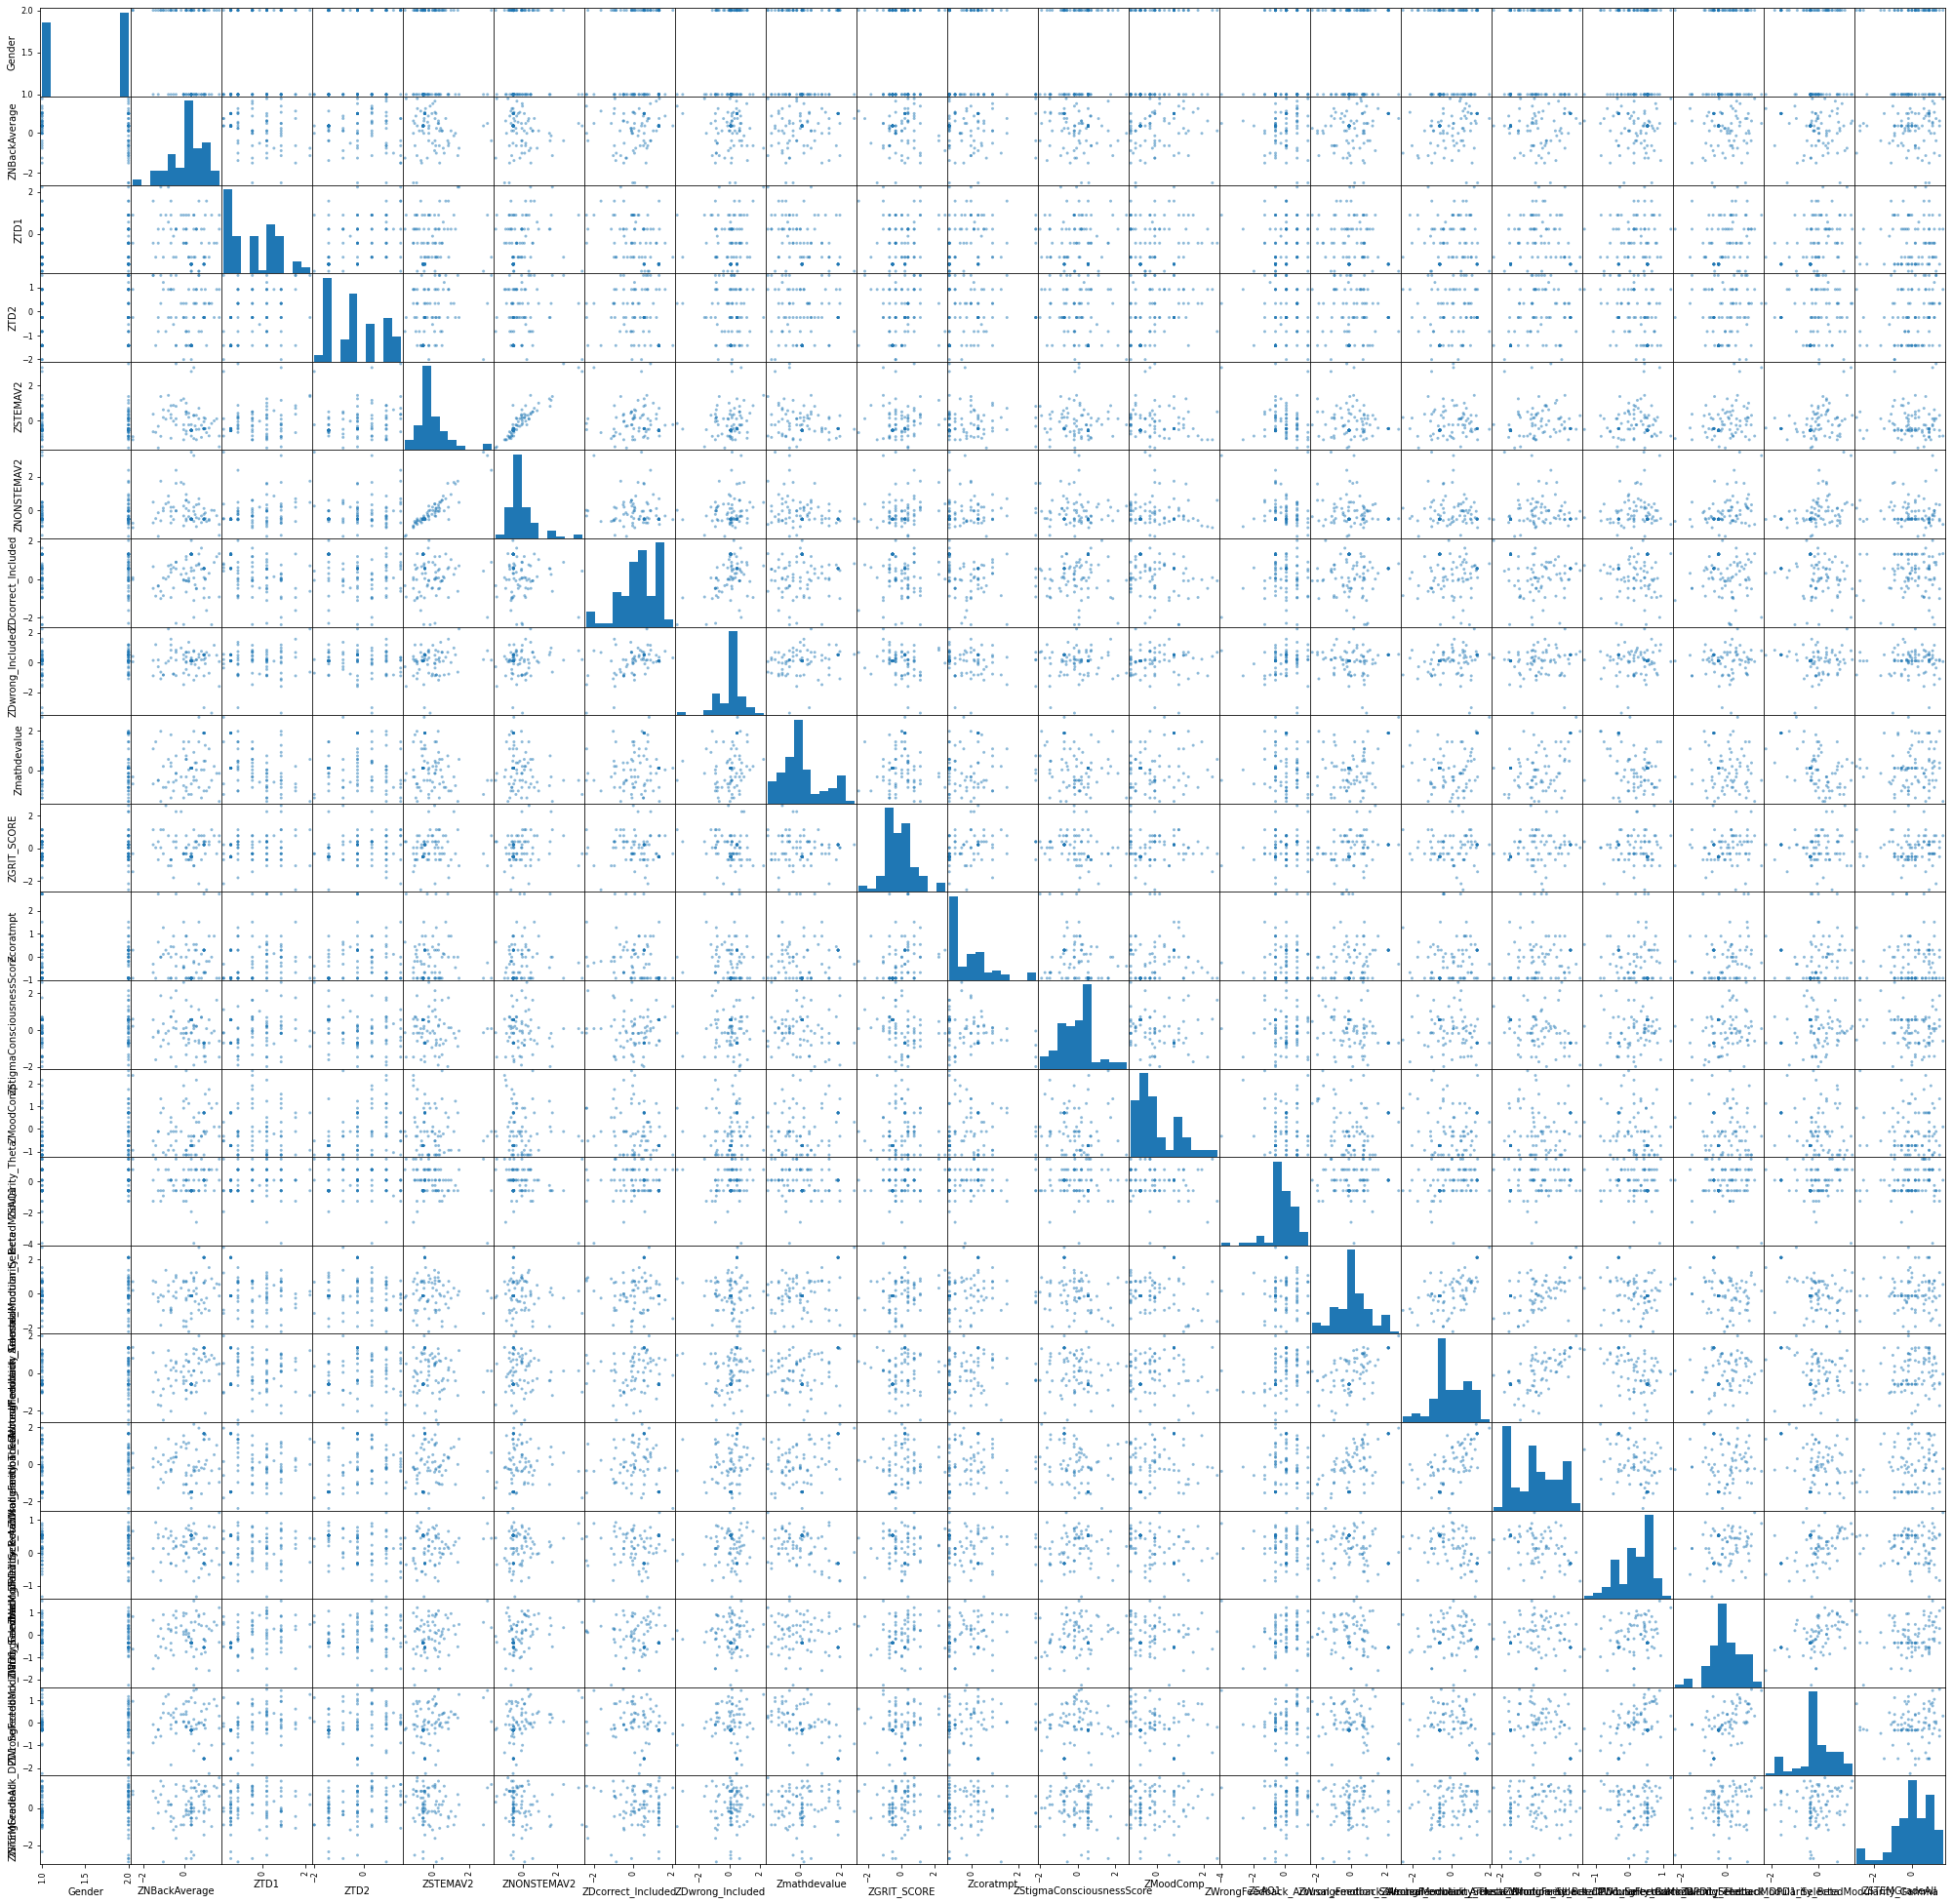

In [ ]:
pd.plotting.scatter_matrix(NCSedit.drop(['SubjectID'], axis = 1), figsize = (35,35));

In [ ]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (82, 20)
Training Labels Shape: (82,)
Testing Features Shape: (10, 20)
Testing Labels Shape: (10,)


(-0.12146871951219528,
 0.9478634918059926,
 -0.42601849999999997,
 0.9478634918059926)

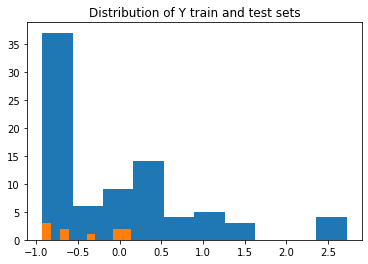

In [ ]:
plt.hist(y_train)
plt.hist(y_test)
plt.title('Distribution of Y train and test sets');
y_train.mean(), y_train.std(), y_test.mean(), y_train.std()

RANDOM FOREST REGRESSOR FOR NORMAL OUTCOMES

In [ ]:
from sklearn.ensemble import RandomForestRegressor
base_model = RandomForestRegressor(n_estimators = 10, random_state = 100)
base_model.fit(X_train, y_train)
predictions = base_model.predict(X_test)

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, base_model.predict(X_test)))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, base_model.predict(X_test)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, base_model.predict(X_test))))

Mean Absolute Error: 0.4745495615530304
Mean Squared Error: 0.46534413343204717
Root Mean Squared Error: 0.6821613690557735


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, base_model.predict(X_train)))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, base_model.predict(X_train)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, base_model.predict(X_train))))

Mean Absolute Error: 0.22200464807372502
Mean Squared Error: 0.129179113273464
Root Mean Squared Error: 0.3594149597240827


Training Data Graph for Normal Outcomes

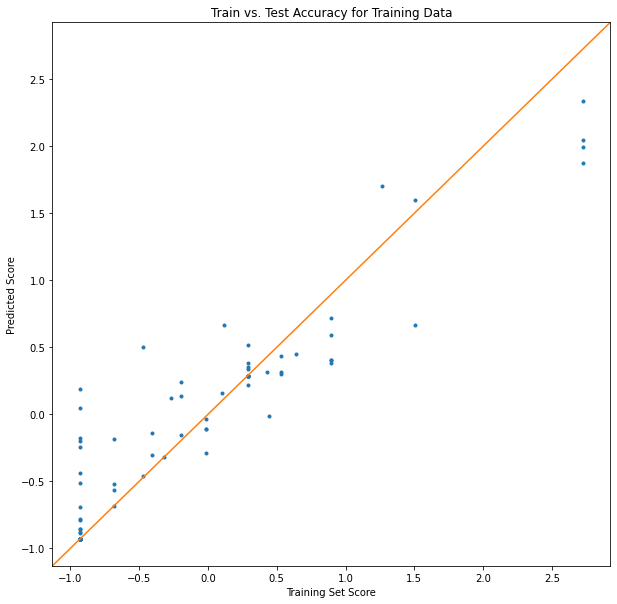

In [ ]:
plt.figure(figsize(10,10))
plt.plot(y_train, base_model.predict(X_train), '.')
plt.xlim(y_train.min()-0.2, y_train.max()+0.2)
plt.ylim(y_train.min()-0.2, y_train.max()+0.2)
plt.plot(plt.xlim(),pl.xlim())
plt.xlabel('Training Set Score'); plt.ylabel('Predicted Score'); plt.title('Train vs. Test Accuracy for Training Data');

Testing Data Graph for Normal Outcomes

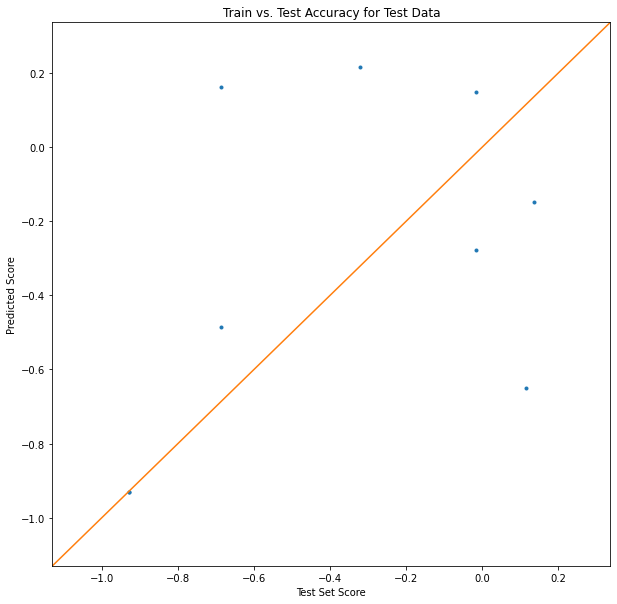

In [ ]:
plt.figure(figsize(10,10))
plt.plot(y_test, base_model.predict(X_test), '.')
plt.xlim(y_test.min()-0.2, y_test.max()+0.2)
plt.ylim(y_test.min()-0.2, y_test.max()+0.2)
plt.plot(plt.xlim(),pl.xlim())
plt.xlabel('Test Set Score'); plt.ylabel('Predicted Score'); plt.title('Train vs. Test Accuracy for Test Data');

RF MODEL STATS

Mean Absolute Error: 0.47 degrees.
Accuracy: 332.55 %.


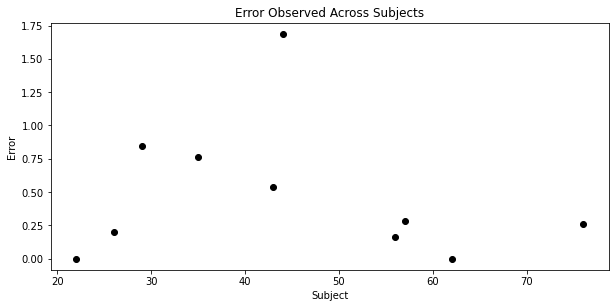

In [ ]:
errors = abs(predictions - y_test)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / y_test))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')
plt.figure()
plt.subplot(211)
plt.plot(errors, 'o', color='black');
# Graph labels
plt.xlabel('Subject'); plt.ylabel('Error'); plt.title('Error Observed Across Subjects');

from sklearn.tree import export_graphviz
import pydot
feature_list = list(X_train.columns)
# Extract the small tree
tree_print = base_model.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_print, out_file = 'tree_print.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree_print.dot')
graph.write_png('tree_print.png');

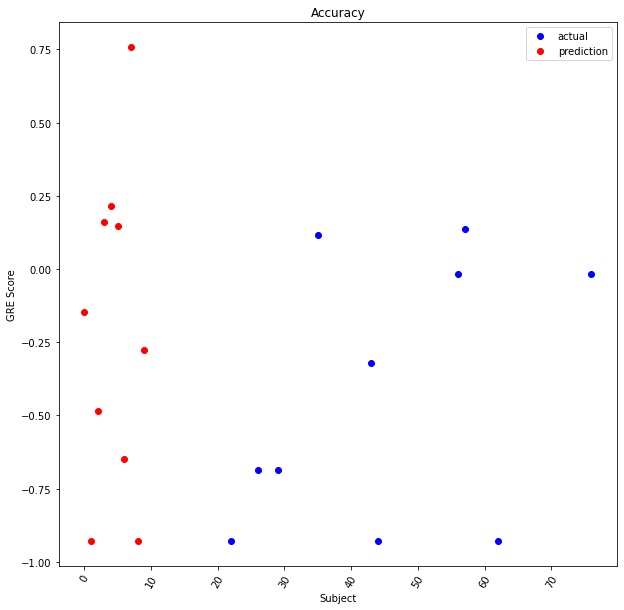

In [ ]:
# Plot the actual values
plt.plot(y_test, 'bo', label = 'actual')
# Plot the predicted values
plt.plot(predictions, 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
# Graph labels
plt.xlabel('Subject'); plt.ylabel('GRE Score'); plt.title('Accuracy');

# RUN RANDOM FOREST CLASSIFIER USING SKLEARN 

[info about this type of model here](https://towardsdatascience.com/random-forest-in-python-24d0893d51c0)

In [ ]:
X.columns


Index(['Gender', 'ZNBackAverage', 'ZTD1', 'ZTD2', 'ZSTEMAV2', 'ZNONSTEMAV2',
       'ZDcorrect_Included', 'ZDwrong_Included', 'Zmathdevalue', 'ZGRIT_SCORE',
       'ZStigmaConsciousnessScore', 'ZMoodComp', 'ZSAQ1',
       'ZWrongFeedback_Arousal_emotion_SelectedModularity_Theta',
       'ZWrongFeedback_Arousal_emotion_SelectedModularity_Beta',
       'ZWrongFeedback_Arousal_emotion_SelectedModularity_Gamma',
       'ZWrongFeedback_DPD1_SelectedModularity_Theta',
       'ZWrongFeedback_DPD1_SelectedModularity_Beta',
       'ZWrongFeedback_DPD1_SelectedModularity_Gamma', 'ZSTEMGradeAll'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
clNCS = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=10)
                
clNCS.fit(X_train, y_train)
print(clNCS.score(X_test, y_test))
print(clNCS.feature_importances_)


-1.233288750949765
[0.         0.05625215 0.01565373 0.         0.         0.
 0.10400105 0.         0.08193467 0.17003465 0.22313463 0.01881468
 0.0129701  0.02161622 0.         0.04880878 0.11234783 0.04161736
 0.06079424 0.0320199 ]


# FINDING THE BEST PARAMETERS FOR THE MODEL 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 2, 3, 4, 5, 6, 6, 7, 8, 9, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   18.1s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_
{'bootstrap': True,
 'max_depth': 70,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 400}

{'bootstrap': True,
 'max_depth': 70,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 400}

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print("score", model.score(test_features, test_labels))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42, max_depth=3)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)
print("###")
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_train, y_train)
random_accuracy = evaluate(best_random, X_test, y_test)
#still working on this part

Model Performance
Average Error: 0.4120 degrees.
Accuracy = 166.26%.
score 0.597247597286605
Model Performance
Average Error: 0.4675 degrees.
Accuracy = 233.25%.
score -1.5234667677180616
###
Model Performance
Average Error: 0.4794 degrees.
Accuracy = 173.73%.
score 0.43871467860949187
Model Performance
Average Error: 0.4925 degrees.
Accuracy = 470.31%.
score -1.2240972409767497


# RUN CORRELATION AND COVARIANCE MATRICES TO OBSERVE YOUR FEATURES (MAKE SURE NOTHING IS TOO CORRELATED OR WONKY)

In [ ]:
features = X.columns

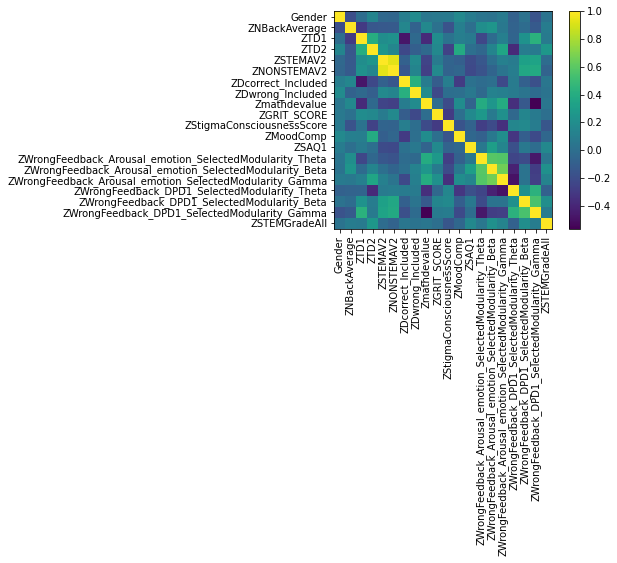

In [ ]:
corrMatrix = np.corrcoef(X.T)
pl.imshow((corrMatrix))
pl.colorbar()
pl.xticks(range(len(features)), features, rotation=90)
pl.yticks(range(len(features)), features);

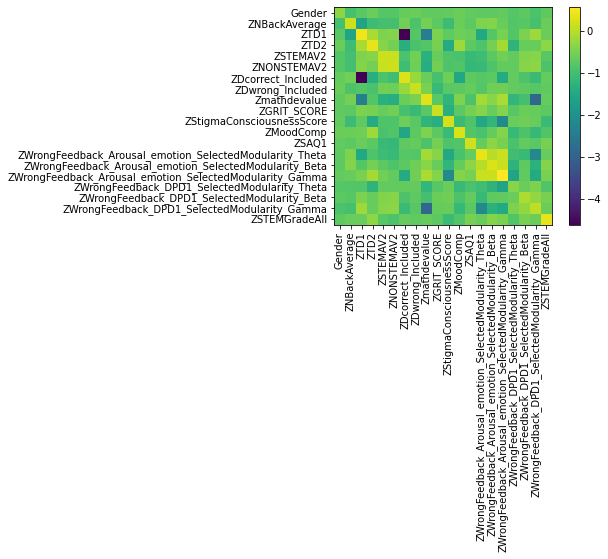

In [ ]:
covMatrix = np.cov(X.T)
pl.imshow(np.log(covMatrix - covMatrix.min() + 0.01))
pl.colorbar()
pl.xticks(range(len(features)), features, rotation=90)
pl.yticks(range(len(features)), features);

# WHAT FEATURES MATTER MOST? RUN FEATURE INDICES AND GRAPH

In [ ]:
importances = clNCS.feature_importances_
importances


std = np.std([tree.feature_importances_ for tree in clNCS.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
importances[indices]

array([0.22313463, 0.17003465, 0.11234783, 0.10400105, 0.08193467,
       0.06079424, 0.05625215, 0.04880878, 0.04161736, 0.0320199 ,
       0.02161622, 0.01881468, 0.01565373, 0.0129701 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

Feature ranking:
1. feature ZStigmaConsciousnessScore (0.223135)
2. feature ZGRIT_SCORE (0.170035)
3. feature ZWrongFeedback_DPD1_SelectedModularity_Theta (0.112348)
4. feature ZDcorrect_Included (0.104001)
5. feature Zmathdevalue (0.081935)
6. feature ZWrongFeedback_DPD1_SelectedModularity_Gamma (0.060794)
7. feature ZNBackAverage (0.056252)
8. feature ZWrongFeedback_Arousal_emotion_SelectedModularity_Gamma (0.048809)
9. feature ZWrongFeedback_DPD1_SelectedModularity_Beta (0.041617)
10. feature ZSTEMGradeAll (0.032020)
11. feature ZWrongFeedback_Arousal_emotion_SelectedModularity_Theta (0.021616)
12. feature ZMoodComp (0.018815)
13. feature ZTD1 (0.015654)
14. feature ZSAQ1 (0.012970)
15. feature ZDwrong_Included (0.000000)
16. feature ZNONSTEMAV2 (0.000000)
17. feature ZSTEMAV2 (0.000000)
18. feature ZTD2 (0.000000)
19. feature ZWrongFeedback_Arousal_emotion_SelectedModularity_Beta (0.000000)
20. feature Gender (0.000000)


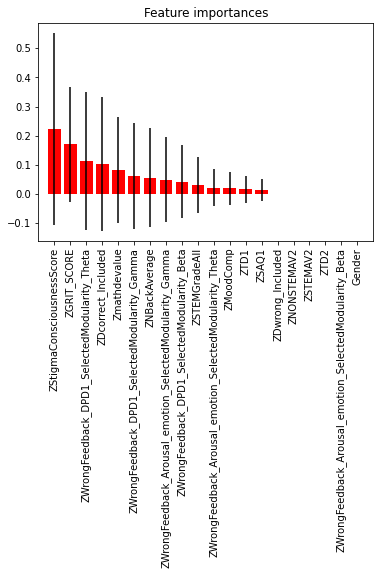

In [ ]:

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, np.array(features)[indices][f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# LOAD DATA

In [ ]:
NCSwomen = pd.read_csv('https://raw.githubusercontent.com/rameyamey/MLApplications/master/RandomForestSTEMAP/NCS/NCSUDVisit10_22_braindataRFcut2girl.csv')

# REPLACE EMPTY CELLS IN A UNIFORM FASHION

In [ ]:
NCSwomen = NCSwomen.replace([np.inf, -np.inf], np.nan)

# CHECK DATA VALUES AND EXTRACT VARIABLE NAMES

In [ ]:
NCSwomen.head()


,SubjectID,Gender,ZNBackAverage,ZTD1,ZTD2,ZSTEMAV2,ZNONSTEMAV2,ZDcorrect_Included,ZDwrong_Included,Zmathdevalue,ZGRIT_SCORE,Zcoratmpt,ZStigmaConsciousnessScore,ZMoodComp,ZSAQ1,ZWrongFeedback_Arousal_emotion_SelectedModularity_Theta,ZWrongFeedback_Arousal_emotion_SelectedModularity_Beta,ZWrongFeedback_Arousal_emotion_SelectedModularity_Gamma,ZWrongFeedback_DPD1_SelectedModularity_Theta,ZWrongFeedback_DPD1_SelectedModularity_Beta,ZWrongFeedback_DPD1_SelectedModularity_Gamma,ZSTEMGradeAll
0,11111,2,-1.51827,-0.45069,1.50740,-0.64777,-0.76648,NaN,NaN,1.07895,NaN,-0.32030,NaN,-0.52983,0.08740,0.73852,1.08916,0.28864,-0.57501,0.65800,-0.89182,0.91743
1,11113,2,1.72645,0.21985,0.92172,-0.89032,-0.86019,1.33689,0.05345,-1.56697,0.77865,-0.92937,-0.60229,0.09468,0.08740,0.52754,-0.05346,-0.24923,1.22614,1.22267,0.29899,1.64387
2,11114,2,-0.89429,0.89040,-0.83531,0.07230,0.37263,0.01340,-0.05136,-0.86139,2.62795,0.28876,-0.18360,-1.15435,0.76471,1.35955,0.39508,-0.43674,0.73350,-0.59902,1.16306,-0.17221
3,11115,2,0.72308,-1.79179,1.50740,0.09699,0.35835,0.75444,-0.37436,1.43174,-2.18022,-0.92937,1.10467,-0.52983,-0.58992,-0.97078,0.51679,0.13910,-0.75768,NaN,NaN,1.28065
4,11117,2,1.10247,1.56094,-1.42099,-0.69571,-0.68497,-1.62439,0.66580,-1.03779,-2.55008,-0.19849,0.07405,-0.11349,0.08740,-0.27082,0.62075,0.20596,0.44906,0.39154,0.60924,0.91743


In [ ]:
NCSwomen.tail()


,SubjectID,Gender,ZNBackAverage,ZTD1,ZTD2,ZSTEMAV2,ZNONSTEMAV2,ZDcorrect_Included,ZDwrong_Included,Zmathdevalue,ZGRIT_SCORE,Zcoratmpt,ZStigmaConsciousnessScore,ZMoodComp,ZSAQ1,ZWrongFeedback_Arousal_emotion_SelectedModularity_Theta,ZWrongFeedback_Arousal_emotion_SelectedModularity_Beta,ZWrongFeedback_Arousal_emotion_SelectedModularity_Gamma,ZWrongFeedback_DPD1_SelectedModularity_Theta,ZWrongFeedback_DPD1_SelectedModularity_Beta,ZWrongFeedback_DPD1_SelectedModularity_Gamma,ZSTEMGradeAll
44,55598,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.71704
45,101010,2,0.22889,0.89040,0.92172,-0.25481,-0.39539,NaN,NaN,-1.21418,-0.70079,-0.92937,0.46053,1.13555,0.08740,-2.23412,0.08852,-1.58672,0.69813,-0.10091,0.94165,-0.17221
46,111352,2,NaN,-0.45069,-1.42099,NaN,NaN,NaN,NaN,-0.33221,0.03893,-0.01577,-1.34305,1.34372,-0.58992,NaN,NaN,NaN,NaN,NaN,NaN,0.19100
47,111372,2,NaN,-0.45069,-0.83531,NaN,NaN,NaN,NaN,0.54976,-0.33093,-0.92937,1.61998,2.59275,-1.26724,-1.63429,-0.90713,-0.60894,-0.02749,0.14473,-0.19681,-2.71473
48,555613,2,-0.64469,0.21985,1.50740,0.33405,-0.06649,0.5294,0.30427,-1.39058,-0.70079,-0.92937,-1.47188,-0.11349,0.08740,NaN,NaN,NaN,NaN,NaN,NaN,0.19100


In [ ]:
NCSwomen.columns

Index(['SubjectID', 'Gender', 'ZNBackAverage', 'ZTD1', 'ZTD2', 'ZSTEMAV2',
       'ZNONSTEMAV2', 'ZDcorrect_Included', 'ZDwrong_Included', 'Zmathdevalue',
       'ZGRIT_SCORE', 'Zcoratmpt', 'ZStigmaConsciousnessScore', 'ZMoodComp',
       'ZSAQ1', 'ZWrongFeedback_Arousal_emotion_SelectedModularity_Theta',
       'ZWrongFeedback_Arousal_emotion_SelectedModularity_Beta',
       'ZWrongFeedback_Arousal_emotion_SelectedModularity_Gamma',
       'ZWrongFeedback_DPD1_SelectedModularity_Theta',
       'ZWrongFeedback_DPD1_SelectedModularity_Beta',
       'ZWrongFeedback_DPD1_SelectedModularity_Gamma', 'ZSTEMGradeAll'],
      dtype='object')

# REPLACE MISSING VALUES USING KNN TECHNIQUE

[More info about this replacement method here](https://towardsdatascience.com/the-use-of-knn-for-missing-values-cf33d935c637)

In [ ]:
from sklearn.impute import KNNImputer
imputerNCSwomen = KNNImputer(n_neighbors=2)
imputerNCSwomen.fit_transform(NCSwomen)

array([[ 1.11110e+04,  2.00000e+00, -1.51827e+00, ...,  6.58000e-01,
        -8.91820e-01,  9.17430e-01],
       [ 1.11130e+04,  2.00000e+00,  1.72645e+00, ...,  1.22267e+00,
         2.98990e-01,  1.64387e+00],
       [ 1.11140e+04,  2.00000e+00, -8.94290e-01, ..., -5.99020e-01,
         1.16306e+00, -1.72210e-01],
       ...,
       [ 1.11352e+05,  2.00000e+00, -5.82295e-01, ...,  2.19100e-02,
         3.72420e-01,  1.91000e-01],
       [ 1.11372e+05,  2.00000e+00, -5.82295e-01, ...,  1.44730e-01,
        -1.96810e-01, -2.71473e+00],
       [ 5.55613e+05,  2.00000e+00, -6.44690e-01, ..., -5.19290e-01,
         1.54065e-01,  1.91000e-01]])

# MAKE A NEW DATAFRAME WITH NEW VALUES AND CHECK VALUES


In [ ]:
NCSwomenedit = pd.DataFrame(imputerNCSwomen.fit_transform(NCSwomen))

In [ ]:
NCSwomenedit.columns = NCSwomen.columns

In [ ]:
NCSwomen.head()

,SubjectID,Gender,ZNBackAverage,ZTD1,ZTD2,ZSTEMAV2,ZNONSTEMAV2,ZDcorrect_Included,ZDwrong_Included,Zmathdevalue,ZGRIT_SCORE,Zcoratmpt,ZStigmaConsciousnessScore,ZMoodComp,ZSAQ1,ZWrongFeedback_Arousal_emotion_SelectedModularity_Theta,ZWrongFeedback_Arousal_emotion_SelectedModularity_Beta,ZWrongFeedback_Arousal_emotion_SelectedModularity_Gamma,ZWrongFeedback_DPD1_SelectedModularity_Theta,ZWrongFeedback_DPD1_SelectedModularity_Beta,ZWrongFeedback_DPD1_SelectedModularity_Gamma,ZSTEMGradeAll
0,11111,2,-1.51827,-0.45069,1.50740,-0.64777,-0.76648,NaN,NaN,1.07895,NaN,-0.32030,NaN,-0.52983,0.08740,0.73852,1.08916,0.28864,-0.57501,0.65800,-0.89182,0.91743
1,11113,2,1.72645,0.21985,0.92172,-0.89032,-0.86019,1.33689,0.05345,-1.56697,0.77865,-0.92937,-0.60229,0.09468,0.08740,0.52754,-0.05346,-0.24923,1.22614,1.22267,0.29899,1.64387
2,11114,2,-0.89429,0.89040,-0.83531,0.07230,0.37263,0.01340,-0.05136,-0.86139,2.62795,0.28876,-0.18360,-1.15435,0.76471,1.35955,0.39508,-0.43674,0.73350,-0.59902,1.16306,-0.17221
3,11115,2,0.72308,-1.79179,1.50740,0.09699,0.35835,0.75444,-0.37436,1.43174,-2.18022,-0.92937,1.10467,-0.52983,-0.58992,-0.97078,0.51679,0.13910,-0.75768,NaN,NaN,1.28065
4,11117,2,1.10247,1.56094,-1.42099,-0.69571,-0.68497,-1.62439,0.66580,-1.03779,-2.55008,-0.19849,0.07405,-0.11349,0.08740,-0.27082,0.62075,0.20596,0.44906,0.39154,0.60924,0.91743


In [ ]:
NCSwomenedit.tail()

,SubjectID,Gender,ZNBackAverage,ZTD1,ZTD2,ZSTEMAV2,ZNONSTEMAV2,ZDcorrect_Included,ZDwrong_Included,Zmathdevalue,ZGRIT_SCORE,Zcoratmpt,ZStigmaConsciousnessScore,ZMoodComp,ZSAQ1,ZWrongFeedback_Arousal_emotion_SelectedModularity_Theta,ZWrongFeedback_Arousal_emotion_SelectedModularity_Beta,ZWrongFeedback_Arousal_emotion_SelectedModularity_Gamma,ZWrongFeedback_DPD1_SelectedModularity_Theta,ZWrongFeedback_DPD1_SelectedModularity_Beta,ZWrongFeedback_DPD1_SelectedModularity_Gamma,ZSTEMGradeAll
44,55598.0,2.0,-1.206280,-1.12124,-0.249635,-0.257165,-0.197315,-0.861255,0.173725,0.814355,0.59372,0.16695,-1.080565,0.094685,0.426055,-0.162695,-1.229240,-0.052965,0.70900,-0.014225,0.104730,-0.71704
45,101010.0,2.0,0.228890,0.89040,0.921720,-0.254810,-0.395390,-0.861255,0.173725,-1.214180,-0.70079,-0.92937,0.460530,1.135550,0.087400,-2.234120,0.088520,-1.586720,0.69813,-0.100910,0.941650,-0.17221
46,111352.0,2.0,-0.582295,-0.45069,-1.420990,-0.467910,-0.452510,-0.861255,0.173725,-0.332210,0.03893,-0.01577,-1.343050,1.343720,-0.589920,-1.934205,-0.409305,-1.097830,0.33532,0.021910,0.372420,0.19100
47,111372.0,2.0,-0.582295,-0.45069,-0.835310,-0.467910,-0.452510,-0.861255,0.173725,0.549760,-0.33093,-0.92937,1.619980,2.592750,-1.267240,-1.634290,-0.907130,-0.608940,-0.02749,0.144730,-0.196810,-2.71473
48,555613.0,2.0,-0.644690,0.21985,1.507400,0.334050,-0.066490,0.529400,0.304270,-1.390580,-0.70079,-0.92937,-1.471880,-0.113490,0.087400,-0.785500,0.067865,-0.351720,0.81174,-0.519290,0.154065,0.19100


In [ ]:
X = NCSwomenedit.drop(['Zcoratmpt', "SubjectID","Gender"], axis = 1)
y = NCSwomenedit.Zcoratmpt#MajorChangeLikelihood_PostQ

#pd.plotting.scatter_matrix(X, figsize=(10,10));
#print(X.columns)

import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100)
X_train.describe()

,ZNBackAverage,ZTD1,ZTD2,ZSTEMAV2,ZNONSTEMAV2,ZDcorrect_Included,ZDwrong_Included,Zmathdevalue,ZGRIT_SCORE,ZStigmaConsciousnessScore,ZMoodComp,ZSAQ1,ZWrongFeedback_Arousal_emotion_SelectedModularity_Theta,ZWrongFeedback_Arousal_emotion_SelectedModularity_Beta,ZWrongFeedback_Arousal_emotion_SelectedModularity_Gamma,ZWrongFeedback_DPD1_SelectedModularity_Theta,ZWrongFeedback_DPD1_SelectedModularity_Beta,ZWrongFeedback_DPD1_SelectedModularity_Gamma,ZSTEMGradeAll
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.00000,44.000000,44.000000,44.000000
mean,-0.192416,-0.084942,0.056516,-0.107278,-0.121589,0.177581,0.152749,-0.083654,0.127193,0.016038,0.130168,0.241332,-0.326955,-0.218854,-0.376202,0.29164,0.105765,0.083648,0.070273
std,1.129040,0.893854,0.888571,0.776600,0.683007,1.130626,0.484401,0.897884,0.969155,0.926851,0.868803,0.599857,0.881220,0.904376,0.803908,0.47520,0.626576,0.540354,1.182277
min,-2.516650,-1.791790,-1.420990,-1.571600,-1.572880,-2.289130,-1.107660,-1.566970,-2.550080,-1.616810,-1.154350,-1.267240,-2.234120,-2.505690,-2.394870,-0.84498,-2.263410,-1.326650,-2.896340
25%,-1.206280,-1.121240,-0.249635,-0.516269,-0.524752,-0.861255,0.051875,-0.861390,-0.330930,-0.843842,-0.217575,0.087400,-1.046800,-1.222595,-1.090967,-0.02368,-0.056019,-0.238510,-0.535430
50%,-0.488695,0.219850,0.043205,-0.254655,-0.197315,0.111958,0.173725,-0.332210,0.223860,0.162620,-0.009405,0.426055,-0.203553,0.078192,-0.223245,0.32849,0.153500,0.104730,0.327210
75%,1.055670,0.219850,0.921720,0.226020,0.053960,1.181242,0.324490,0.814355,0.593720,0.460530,0.563072,0.426055,0.492481,0.409510,0.149850,0.70900,0.363295,0.436239,0.917430
max,1.726450,2.231490,1.507400,3.230400,2.386450,2.019670,1.191810,1.960920,2.627950,2.135290,2.592750,1.442030,1.359550,1.374060,1.085720,1.22614,1.222670,1.163060,1.643870


In [ ]:
X_test.describe()

,ZNBackAverage,ZTD1,ZTD2,ZSTEMAV2,ZNONSTEMAV2,ZDcorrect_Included,ZDwrong_Included,Zmathdevalue,ZGRIT_SCORE,ZStigmaConsciousnessScore,ZMoodComp,ZSAQ1,ZWrongFeedback_Arousal_emotion_SelectedModularity_Theta,ZWrongFeedback_Arousal_emotion_SelectedModularity_Beta,ZWrongFeedback_Arousal_emotion_SelectedModularity_Gamma,ZWrongFeedback_DPD1_SelectedModularity_Theta,ZWrongFeedback_DPD1_SelectedModularity_Beta,ZWrongFeedback_DPD1_SelectedModularity_Gamma,ZSTEMGradeAll
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,-0.220381,-0.316584,0.160340,0.304307,0.213829,0.377354,0.602331,0.373369,0.482762,-0.419356,-0.259208,-0.048066,-0.216633,-0.311850,0.269081,0.186200,-0.184175,-0.573082,-0.063252
std,0.716090,0.874285,0.490012,0.514499,0.823003,0.898235,0.337809,1.113873,1.098739,1.072364,0.308767,0.513601,0.879490,1.320825,1.334757,0.615069,0.626571,0.943584,0.490679
min,-1.206280,-1.121240,-0.249635,-0.257165,-0.373490,-0.861255,0.173725,-0.949590,-0.700790,-1.906670,-0.738000,-0.589920,-1.115740,-2.033850,-1.368500,-0.863880,-0.986320,-1.863480,-0.898650
25%,-0.644690,-1.121240,-0.249630,0.135270,-0.197315,0.254360,0.324490,-0.332210,0.038930,-1.080565,-0.321660,-0.589920,-1.046800,-1.229240,-0.317260,0.232240,-0.686700,-1.236030,0.009390
50%,-0.145500,-0.450690,0.043205,0.226020,-0.072720,0.365390,0.727780,0.373370,0.223860,-0.183600,-0.217575,0.087400,-0.162695,0.064930,-0.052965,0.328490,-0.014225,-0.238510,0.009390
75%,0.416085,0.219850,0.336040,0.271780,0.053960,0.458110,0.818520,0.814355,0.593720,0.355865,-0.113490,0.426055,0.312690,0.334810,0.927190,0.525150,0.353880,0.104730,0.191000
max,0.478480,0.890400,0.921720,1.145630,1.658710,1.670165,0.967140,1.960920,2.258090,0.718190,0.094685,0.426055,0.929380,1.304100,2.156940,0.709000,0.412490,0.367880,0.372610


# RUN RANDOM FOREST CLASSIFIER USING SKLEARN 

[info about this type of model here](https://towardsdatascience.com/random-forest-in-python-24d0893d51c0)

In [ ]:
X.columns


Index(['ZNBackAverage', 'ZTD1', 'ZTD2', 'ZSTEMAV2', 'ZNONSTEMAV2',
       'ZDcorrect_Included', 'ZDwrong_Included', 'Zmathdevalue', 'ZGRIT_SCORE',
       'ZStigmaConsciousnessScore', 'ZMoodComp', 'ZSAQ1',
       'ZWrongFeedback_Arousal_emotion_SelectedModularity_Theta',
       'ZWrongFeedback_Arousal_emotion_SelectedModularity_Beta',
       'ZWrongFeedback_Arousal_emotion_SelectedModularity_Gamma',
       'ZWrongFeedback_DPD1_SelectedModularity_Theta',
       'ZWrongFeedback_DPD1_SelectedModularity_Beta',
       'ZWrongFeedback_DPD1_SelectedModularity_Gamma', 'ZSTEMGradeAll'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
clNCSwomen = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=10)
                
clNCSwomen.fit(X_train, y_train)
print(clNCSwomen.score(X_test, y_test))
print(clNCSwomen.feature_importances_)


0.5509431391924379
[0.         0.         0.05393629 0.         0.08870824 0.01522026
 0.02989989 0.         0.21740069 0.05626102 0.         0.01540818
 0.08702968 0.         0.00885777 0.         0.24874942 0.09717456
 0.081354  ]


# FINDING THE BEST PARAMETERS FOR THE MODEL 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 2, 3, 4, 5, 6, 6, 7, 8, 9, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   16.0s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_
{'bootstrap': True,
 'max_depth': 70,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 400}

{'bootstrap': True,
 'max_depth': 70,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 400}

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print("score", model.score(test_features, test_labels))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42, max_depth=3)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)
print("###")
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_train, y_train)
random_accuracy = evaluate(best_random, X_test, y_test)
#still working on this part

Model Performance
Average Error: 0.2198 degrees.
Accuracy = 141.58%.
score 0.7837752286488063
Model Performance
Average Error: 0.2312 degrees.
Accuracy = 197.48%.
score 0.6074130121094192
###
Model Performance
Average Error: 0.3187 degrees.
Accuracy = 167.16%.
score 0.4607870051945465
Model Performance
Average Error: 0.2950 degrees.
Accuracy = 601.47%.
score 0.5615190788512747


# RUN CORRELATION AND COVARIANCE MATRICES TO OBSERVE YOUR FEATURES (MAKE SURE NOTHING IS TOO CORRELATED OR WONKY)

In [ ]:
features = X.columns

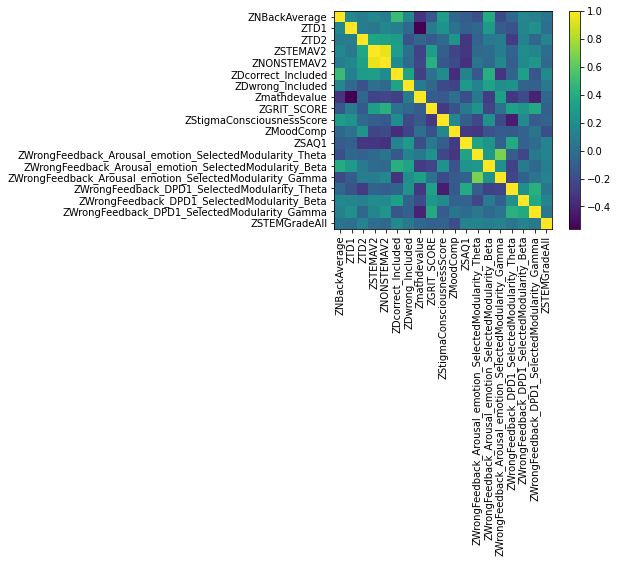

In [ ]:
corrMatrix = np.corrcoef(X.T)
pl.imshow((corrMatrix))
pl.colorbar()
pl.xticks(range(len(features)), features, rotation=90)
pl.yticks(range(len(features)), features);

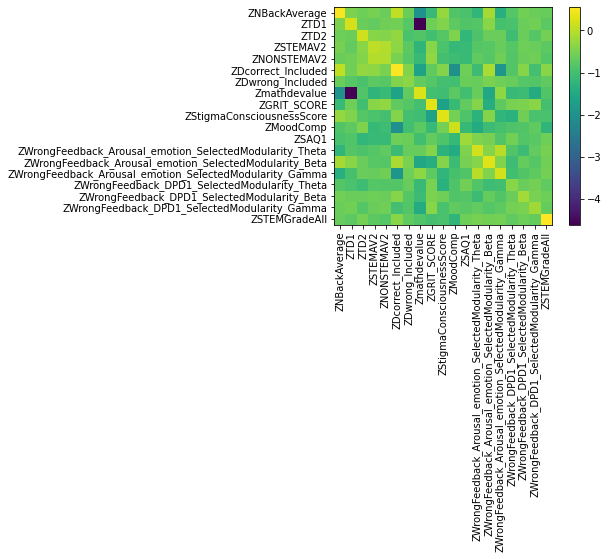

In [ ]:
covMatrix = np.cov(X.T)
pl.imshow(np.log(covMatrix - covMatrix.min() + 0.01))
pl.colorbar()
pl.xticks(range(len(features)), features, rotation=90)
pl.yticks(range(len(features)), features);

In [ ]:
importances = clNCSwomen.feature_importances_
importances


std = np.std([tree.feature_importances_ for tree in clNCSwomen.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
importances[indices]

array([0.24874942, 0.21740069, 0.09717456, 0.08870824, 0.08702968,
       0.081354  , 0.05626102, 0.05393629, 0.02989989, 0.01540818,
       0.01522026, 0.00885777, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

Feature ranking:
1. feature ZWrongFeedback_DPD1_SelectedModularity_Beta (0.248749)
2. feature ZGRIT_SCORE (0.217401)
3. feature ZWrongFeedback_DPD1_SelectedModularity_Gamma (0.097175)
4. feature ZNONSTEMAV2 (0.088708)
5. feature ZWrongFeedback_Arousal_emotion_SelectedModularity_Theta (0.087030)
6. feature ZSTEMGradeAll (0.081354)
7. feature ZStigmaConsciousnessScore (0.056261)
8. feature ZTD2 (0.053936)
9. feature ZDwrong_Included (0.029900)
10. feature ZSAQ1 (0.015408)
11. feature ZDcorrect_Included (0.015220)
12. feature ZWrongFeedback_Arousal_emotion_SelectedModularity_Gamma (0.008858)
13. feature ZMoodComp (0.000000)
14. feature ZWrongFeedback_Arousal_emotion_SelectedModularity_Beta (0.000000)
15. feature Zmathdevalue (0.000000)
16. feature ZWrongFeedback_DPD1_SelectedModularity_Theta (0.000000)
17. feature ZSTEMAV2 (0.000000)
18. feature ZTD1 (0.000000)
19. feature ZNBackAverage (0.000000)


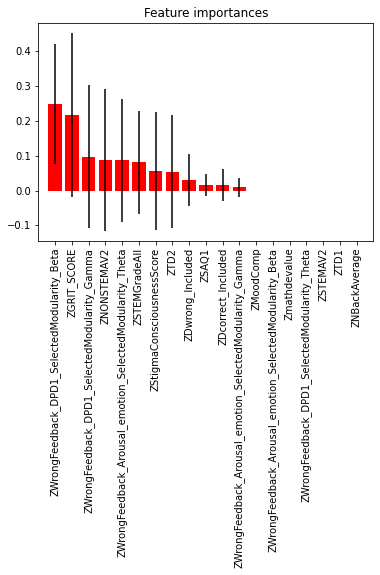

In [ ]:

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, np.array(features)[indices][f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# LOAD DATA

In [ ]:
NCSmen = pd.read_csv('https://raw.githubusercontent.com/rameyamey/MLApplications/master/RandomForestSTEMAP/NCS/NCSUDVisit10_22_braindataRFcut2boy.csv')

# REPLACE EMPTY CELLS IN A UNIFORM FASHION

In [ ]:
NCSmen = NCSmen.replace([np.inf, -np.inf], np.nan)

# CHECK DATA VALUES AND EXTRACT VARIABLE NAMES

In [ ]:
NCSmen.head()


,SubjectID,Gender,ZNBackAverage,ZTD1,ZTD2,ZSTEMAV2,ZNONSTEMAV2,ZDcorrect_Included,ZDwrong_Included,Zmathdevalue,ZGRIT_SCORE,Zcoratmpt,ZStigmaConsciousnessScore,ZMoodComp,ZSAQ1,ZWrongFeedback_Arousal_emotion_SelectedModularity_Theta,ZWrongFeedback_Arousal_emotion_SelectedModularity_Beta,ZWrongFeedback_Arousal_emotion_SelectedModularity_Gamma,ZWrongFeedback_DPD1_SelectedModularity_Theta,ZWrongFeedback_DPD1_SelectedModularity_Beta,ZWrongFeedback_DPD1_SelectedModularity_Gamma,ZSTEMGradeAll
0,11112.0,1.0,-0.02071,-0.45069,0.33604,-1.10578,-0.94416,-0.01954,0.21339,1.43174,-0.33093,-0.47257,-0.18360,1.92660,0.76471,-1.59545,-0.20304,1.54023,-0.24263,0.98675,0.83225,1.00824
1,11116.0,1.0,0.47848,0.89040,0.33604,3.01079,3.26425,-1.98186,0.78259,-0.50861,-1.07065,-0.26493,0.07405,-0.32166,-3.97650,0.14548,0.12107,-0.38711,0.89513,1.52491,1.42755,NaN
2,11118.0,1.0,-0.02071,-0.45069,-0.24963,-0.52816,-0.35028,-2.35260,-1.49794,1.07895,-0.33093,1.50690,0.07405,0.92737,-1.26724,0.73572,-0.55960,-1.55390,0.49305,0.13665,0.04191,NaN
3,11120.0,1.0,0.60328,0.21985,0.33604,0.28861,0.31645,-0.49576,0.18444,0.37337,0.40879,NaN,0.20288,-1.15435,0.76471,1.22003,-0.51622,-1.03564,0.56888,1.08507,1.47981,1.46226
4,11122.0,1.0,-0.39510,0.21985,-0.24963,0.80411,1.60164,0.54591,0.67826,0.72616,0.40879,2.72503,-1.98718,0.09468,-0.58992,0.07510,-0.38753,0.38731,0.17853,0.75849,0.01757,-0.98945


In [ ]:
NCSmen.tail()


,SubjectID,Gender,ZNBackAverage,ZTD1,ZTD2,ZSTEMAV2,ZNONSTEMAV2,ZDcorrect_Included,ZDwrong_Included,Zmathdevalue,ZGRIT_SCORE,Zcoratmpt,ZStigmaConsciousnessScore,ZMoodComp,ZSAQ1,ZWrongFeedback_Arousal_emotion_SelectedModularity_Theta,ZWrongFeedback_Arousal_emotion_SelectedModularity_Beta,ZWrongFeedback_Arousal_emotion_SelectedModularity_Gamma,ZWrongFeedback_DPD1_SelectedModularity_Theta,ZWrongFeedback_DPD1_SelectedModularity_Beta,ZWrongFeedback_DPD1_SelectedModularity_Gamma,ZSTEMGradeAll
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
NCSmen.columns

Index(['SubjectID', 'Gender', 'ZNBackAverage', 'ZTD1', 'ZTD2', 'ZSTEMAV2',
       'ZNONSTEMAV2', 'ZDcorrect_Included', 'ZDwrong_Included', 'Zmathdevalue',
       'ZGRIT_SCORE', 'Zcoratmpt', 'ZStigmaConsciousnessScore', 'ZMoodComp',
       'ZSAQ1', 'ZWrongFeedback_Arousal_emotion_SelectedModularity_Theta',
       'ZWrongFeedback_Arousal_emotion_SelectedModularity_Beta',
       'ZWrongFeedback_Arousal_emotion_SelectedModularity_Gamma',
       'ZWrongFeedback_DPD1_SelectedModularity_Theta',
       'ZWrongFeedback_DPD1_SelectedModularity_Beta',
       'ZWrongFeedback_DPD1_SelectedModularity_Gamma', 'ZSTEMGradeAll'],
      dtype='object')

# REPLACE MISSING VALUES USING KNN TECHNIQUE

[More info about this replacement method here](https://towardsdatascience.com/the-use-of-knn-for-missing-values-cf33d935c637)

In [ ]:
from sklearn.impute import KNNImputer
imputerNCSmen = KNNImputer(n_neighbors=2)
imputerNCSmen.fit_transform(NCSmen)

array([[ 1.11120000e+04,  1.00000000e+00, -2.07100000e-02, ...,
         9.86750000e-01,  8.32250000e-01,  1.00824000e+00],
       [ 1.11160000e+04,  1.00000000e+00,  4.78480000e-01, ...,
         1.52491000e+00,  1.42755000e+00,  2.36405000e-01],
       [ 1.11180000e+04,  1.00000000e+00, -2.07100000e-02, ...,
         1.36650000e-01,  4.19100000e-02,  2.36405000e-01],
       ...,
       [ 3.67052093e+04,  1.00000000e+00,  2.33508519e-01, ...,
         1.27278261e-01,  1.50555652e-01, -4.73590000e-02],
       [ 3.67052093e+04,  1.00000000e+00,  2.33508519e-01, ...,
         1.27278261e-01,  1.50555652e-01, -4.73590000e-02],
       [ 3.67052093e+04,  1.00000000e+00,  2.33508519e-01, ...,
         1.27278261e-01,  1.50555652e-01, -4.73590000e-02]])

# MAKE A NEW DATAFRAME WITH NEW VALUES AND CHECK VALUES


In [ ]:
NCSmenedit = pd.DataFrame(imputerNCSmen.fit_transform(NCSmen))

In [ ]:
NCSmenedit.columns = NCSmen.columns

In [ ]:
NCSmen.head()

,SubjectID,Gender,ZNBackAverage,ZTD1,ZTD2,ZSTEMAV2,ZNONSTEMAV2,ZDcorrect_Included,ZDwrong_Included,Zmathdevalue,ZGRIT_SCORE,Zcoratmpt,ZStigmaConsciousnessScore,ZMoodComp,ZSAQ1,ZWrongFeedback_Arousal_emotion_SelectedModularity_Theta,ZWrongFeedback_Arousal_emotion_SelectedModularity_Beta,ZWrongFeedback_Arousal_emotion_SelectedModularity_Gamma,ZWrongFeedback_DPD1_SelectedModularity_Theta,ZWrongFeedback_DPD1_SelectedModularity_Beta,ZWrongFeedback_DPD1_SelectedModularity_Gamma,ZSTEMGradeAll
0,11112.0,1.0,-0.02071,-0.45069,0.33604,-1.10578,-0.94416,-0.01954,0.21339,1.43174,-0.33093,-0.47257,-0.18360,1.92660,0.76471,-1.59545,-0.20304,1.54023,-0.24263,0.98675,0.83225,1.00824
1,11116.0,1.0,0.47848,0.89040,0.33604,3.01079,3.26425,-1.98186,0.78259,-0.50861,-1.07065,-0.26493,0.07405,-0.32166,-3.97650,0.14548,0.12107,-0.38711,0.89513,1.52491,1.42755,NaN
2,11118.0,1.0,-0.02071,-0.45069,-0.24963,-0.52816,-0.35028,-2.35260,-1.49794,1.07895,-0.33093,1.50690,0.07405,0.92737,-1.26724,0.73572,-0.55960,-1.55390,0.49305,0.13665,0.04191,NaN
3,11120.0,1.0,0.60328,0.21985,0.33604,0.28861,0.31645,-0.49576,0.18444,0.37337,0.40879,NaN,0.20288,-1.15435,0.76471,1.22003,-0.51622,-1.03564,0.56888,1.08507,1.47981,1.46226
4,11122.0,1.0,-0.39510,0.21985,-0.24963,0.80411,1.60164,0.54591,0.67826,0.72616,0.40879,2.72503,-1.98718,0.09468,-0.58992,0.07510,-0.38753,0.38731,0.17853,0.75849,0.01757,-0.98945


In [ ]:
NCSmenedit.tail()

,SubjectID,Gender,ZNBackAverage,ZTD1,ZTD2,ZSTEMAV2,ZNONSTEMAV2,ZDcorrect_Included,ZDwrong_Included,Zmathdevalue,ZGRIT_SCORE,Zcoratmpt,ZStigmaConsciousnessScore,ZMoodComp,ZSAQ1,ZWrongFeedback_Arousal_emotion_SelectedModularity_Theta,ZWrongFeedback_Arousal_emotion_SelectedModularity_Beta,ZWrongFeedback_Arousal_emotion_SelectedModularity_Gamma,ZWrongFeedback_DPD1_SelectedModularity_Theta,ZWrongFeedback_DPD1_SelectedModularity_Beta,ZWrongFeedback_DPD1_SelectedModularity_Gamma,ZSTEMGradeAll
87,36705.209302,1.0,0.233509,-0.026015,-0.15202,0.069877,0.085483,-0.153916,-0.169605,0.079377,-0.043261,0.230065,-0.128137,-0.155123,-0.087395,0.170747,0.107289,0.126066,0.156853,0.127278,0.150556,-0.047359
88,36705.209302,1.0,0.233509,-0.026015,-0.15202,0.069877,0.085483,-0.153916,-0.169605,0.079377,-0.043261,0.230065,-0.128137,-0.155123,-0.087395,0.170747,0.107289,0.126066,0.156853,0.127278,0.150556,-0.047359
89,36705.209302,1.0,0.233509,-0.026015,-0.15202,0.069877,0.085483,-0.153916,-0.169605,0.079377,-0.043261,0.230065,-0.128137,-0.155123,-0.087395,0.170747,0.107289,0.126066,0.156853,0.127278,0.150556,-0.047359
90,36705.209302,1.0,0.233509,-0.026015,-0.15202,0.069877,0.085483,-0.153916,-0.169605,0.079377,-0.043261,0.230065,-0.128137,-0.155123,-0.087395,0.170747,0.107289,0.126066,0.156853,0.127278,0.150556,-0.047359
91,36705.209302,1.0,0.233509,-0.026015,-0.15202,0.069877,0.085483,-0.153916,-0.169605,0.079377,-0.043261,0.230065,-0.128137,-0.155123,-0.087395,0.170747,0.107289,0.126066,0.156853,0.127278,0.150556,-0.047359


In [ ]:
X = NCSmenedit.drop(['Zcoratmpt', "SubjectID","Gender"], axis = 1)
y = NCSmenedit.Zcoratmpt#MajorChangeLikelihood_PostQ

#pd.plotting.scatter_matrix(X, figsize=(10,10));
#print(X.columns)

import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100)
X_train.describe()

,ZNBackAverage,ZTD1,ZTD2,ZSTEMAV2,ZNONSTEMAV2,ZDcorrect_Included,ZDwrong_Included,Zmathdevalue,ZGRIT_SCORE,ZStigmaConsciousnessScore,ZMoodComp,ZSAQ1,ZWrongFeedback_Arousal_emotion_SelectedModularity_Theta,ZWrongFeedback_Arousal_emotion_SelectedModularity_Beta,ZWrongFeedback_Arousal_emotion_SelectedModularity_Gamma,ZWrongFeedback_DPD1_SelectedModularity_Theta,ZWrongFeedback_DPD1_SelectedModularity_Beta,ZWrongFeedback_DPD1_SelectedModularity_Gamma,ZSTEMGradeAll
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,0.213808,-0.105336,-0.227016,0.040041,0.064994,-0.107700,-0.222235,0.108418,0.004851,-0.039479,-0.204373,-0.231412,0.284642,0.099567,0.079488,0.184461,0.084835,0.082257,-0.077950
std,0.470049,0.666377,0.578665,0.626795,0.663422,0.566547,0.697576,0.580154,0.444378,0.624524,0.570868,0.806857,0.590198,0.500516,0.591215,0.328761,0.411117,0.517010,0.513311
min,-1.518270,-1.791790,-2.006660,-1.506750,-1.512900,-2.361480,-3.407660,-1.390580,-1.810370,-1.987180,-1.154350,-3.976500,-1.595450,-1.066720,-1.825170,-1.341700,-1.607750,-2.246230,-2.351510
25%,0.233509,-0.450690,-0.249630,-0.294368,-0.172115,-0.153916,-0.398479,0.079377,-0.043261,-0.128137,-0.477788,-0.464289,0.170747,-0.016625,-0.186830,0.156853,-0.140859,-0.007845,-0.172210
50%,0.233509,-0.026015,-0.152020,0.069877,0.085483,-0.153916,-0.169605,0.079377,-0.043261,-0.128137,-0.155123,-0.087395,0.170747,0.107289,0.126066,0.156853,0.127278,0.150556,-0.047359
75%,0.353685,-0.026015,-0.152020,0.069877,0.085483,0.087892,-0.169605,0.108775,0.223860,0.049895,-0.155123,-0.087395,0.182539,0.107289,0.126066,0.369325,0.127278,0.150556,-0.047359
max,1.726450,2.231490,1.507400,3.010790,3.469500,1.626670,2.251010,2.666500,1.148510,2.586180,2.176410,1.442030,2.689270,1.987930,1.948690,0.895130,1.524910,1.479810,1.462260


In [ ]:
X_test.describe()

,ZNBackAverage,ZTD1,ZTD2,ZSTEMAV2,ZNONSTEMAV2,ZDcorrect_Included,ZDwrong_Included,Zmathdevalue,ZGRIT_SCORE,ZStigmaConsciousnessScore,ZMoodComp,ZSAQ1,ZWrongFeedback_Arousal_emotion_SelectedModularity_Theta,ZWrongFeedback_Arousal_emotion_SelectedModularity_Beta,ZWrongFeedback_Arousal_emotion_SelectedModularity_Gamma,ZWrongFeedback_DPD1_SelectedModularity_Theta,ZWrongFeedback_DPD1_SelectedModularity_Beta,ZWrongFeedback_DPD1_SelectedModularity_Gamma,ZSTEMGradeAll
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.113103,0.038804,-0.132498,-0.119866,-0.087587,-0.149752,-0.544135,0.055857,-0.084357,-0.311013,-0.034383,-0.017479,-0.008426,-0.207198,-0.143271,0.108482,-0.134081,0.110230,0.302236
std,0.505476,0.341011,0.507837,0.360906,0.316795,0.402521,0.928524,0.627150,0.266858,0.698654,0.571352,0.719637,0.598430,0.713488,0.541837,0.256019,0.392221,0.230341,0.569760
min,-1.019085,-0.450695,-0.835310,-0.966720,-0.749520,-0.964550,-3.046090,-1.390580,-0.700790,-1.729530,-0.529830,-1.267235,-1.145420,-2.141800,-1.603320,-0.481280,-0.859120,-0.432060,-0.047359
25%,0.233509,-0.026015,-0.152020,-0.205959,-0.107716,-0.153916,-0.527651,0.079377,-0.043261,-0.128137,-0.155123,-0.087395,0.026389,-0.003279,-0.144210,0.134681,-0.263779,0.134711,-0.047359
50%,0.233509,-0.026015,-0.152020,0.069877,0.085483,-0.153916,-0.169605,0.079377,-0.043261,-0.128137,-0.155123,-0.087395,0.170747,0.107289,0.126066,0.156853,0.127278,0.150556,-0.047359
75%,0.233509,-0.026015,-0.152020,0.069877,0.085483,-0.153916,-0.169605,0.101425,-0.043261,-0.128137,-0.155123,-0.087395,0.170747,0.107289,0.126066,0.156853,0.127278,0.150556,0.690420
max,0.852870,0.890400,0.921720,0.140330,0.109645,0.526000,0.174810,1.255340,0.223860,0.681380,1.551890,1.442030,0.960515,0.107289,0.126066,0.555680,0.127278,0.509440,1.462260


# RUN RANDOM FOREST CLASSIFIER USING SKLEARN 

[info about this type of model here](https://towardsdatascience.com/random-forest-in-python-24d0893d51c0)

In [ ]:
X.columns


Index(['ZNBackAverage', 'ZTD1', 'ZTD2', 'ZSTEMAV2', 'ZNONSTEMAV2',
       'ZDcorrect_Included', 'ZDwrong_Included', 'Zmathdevalue', 'ZGRIT_SCORE',
       'ZStigmaConsciousnessScore', 'ZMoodComp', 'ZSAQ1',
       'ZWrongFeedback_Arousal_emotion_SelectedModularity_Theta',
       'ZWrongFeedback_Arousal_emotion_SelectedModularity_Beta',
       'ZWrongFeedback_Arousal_emotion_SelectedModularity_Gamma',
       'ZWrongFeedback_DPD1_SelectedModularity_Theta',
       'ZWrongFeedback_DPD1_SelectedModularity_Beta',
       'ZWrongFeedback_DPD1_SelectedModularity_Gamma', 'ZSTEMGradeAll'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
clNCSmen = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=10)
                
clNCSmen.fit(X_train, y_train)
print(clNCSwomen.score(X_test, y_test))
print(clNCSwomen.feature_importances_)


-0.9707681204116521
[0.         0.         0.05393629 0.         0.08870824 0.01522026
 0.02989989 0.         0.21740069 0.05626102 0.         0.01540818
 0.08702968 0.         0.00885777 0.         0.24874942 0.09717456
 0.081354  ]


# FINDING THE BEST PARAMETERS FOR THE MODEL 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 2, 3, 4, 5, 6, 6, 7, 8, 9, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   16.1s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_
{'bootstrap': True,
 'max_depth': 70,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 400}

{'bootstrap': True,
 'max_depth': 70,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 400}

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print("score", model.score(test_features, test_labels))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42, max_depth=3)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)
print("###")
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_train, y_train)
random_accuracy = evaluate(best_random, X_test, y_test)
#still working on this part

Model Performance
Average Error: 0.3040 degrees.
Accuracy = 159.95%.
score 0.5909633929814971
Model Performance
Average Error: 0.5615 degrees.
Accuracy = 10.83%.
score -5.721086387364276
###
Model Performance
Average Error: 0.2869 degrees.
Accuracy = 162.55%.
score 0.3742860869522782
Model Performance
Average Error: 0.2288 degrees.
Accuracy = 110.17%.
score -0.6440277965495769


# RUN CORRELATION AND COVARIANCE MATRICES TO OBSERVE YOUR FEATURES (MAKE SURE NOTHING IS TOO CORRELATED OR WONKY)

In [ ]:
features = X.columns

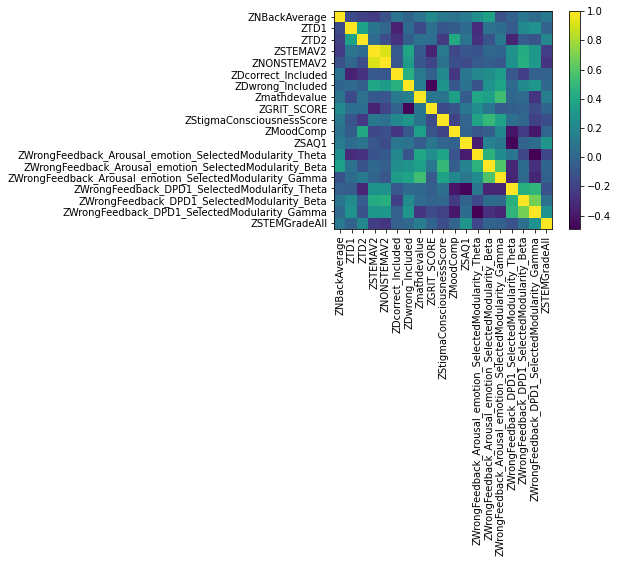

In [ ]:
corrMatrix = np.corrcoef(X.T)
pl.imshow((corrMatrix))
pl.colorbar()
pl.xticks(range(len(features)), features, rotation=90)
pl.yticks(range(len(features)), features);

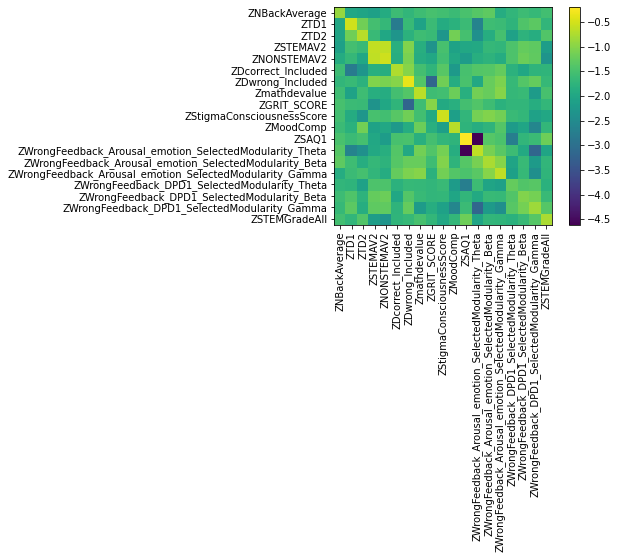

In [ ]:
covMatrix = np.cov(X.T)
pl.imshow(np.log(covMatrix - covMatrix.min() + 0.01))
pl.colorbar()
pl.xticks(range(len(features)), features, rotation=90)
pl.yticks(range(len(features)), features);

In [ ]:
importances = clNCSmen.feature_importances_
importances


std = np.std([tree.feature_importances_ for tree in clNCSmen.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
importances[indices]

array([0.2479318 , 0.2107885 , 0.1166478 , 0.09392965, 0.09144557,
       0.07339541, 0.03534468, 0.03314841, 0.02753305, 0.02538548,
       0.01726079, 0.01470881, 0.01248004, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

Feature ranking:
1. feature ZNBackAverage (0.247932)
2. feature ZStigmaConsciousnessScore (0.210789)
3. feature ZWrongFeedback_Arousal_emotion_SelectedModularity_Gamma (0.116648)
4. feature ZWrongFeedback_Arousal_emotion_SelectedModularity_Beta (0.093930)
5. feature ZWrongFeedback_DPD1_SelectedModularity_Beta (0.091446)
6. feature Zmathdevalue (0.073395)
7. feature ZSTEMAV2 (0.035345)
8. feature ZWrongFeedback_Arousal_emotion_SelectedModularity_Theta (0.033148)
9. feature ZTD2 (0.027533)
10. feature ZSTEMGradeAll (0.025385)
11. feature ZDwrong_Included (0.017261)
12. feature ZWrongFeedback_DPD1_SelectedModularity_Theta (0.014709)
13. feature ZGRIT_SCORE (0.012480)
14. feature ZWrongFeedback_DPD1_SelectedModularity_Gamma (0.000000)
15. feature ZDcorrect_Included (0.000000)
16. feature ZNONSTEMAV2 (0.000000)
17. feature ZMoodComp (0.000000)
18. feature ZSAQ1 (0.000000)
19. feature ZTD1 (0.000000)


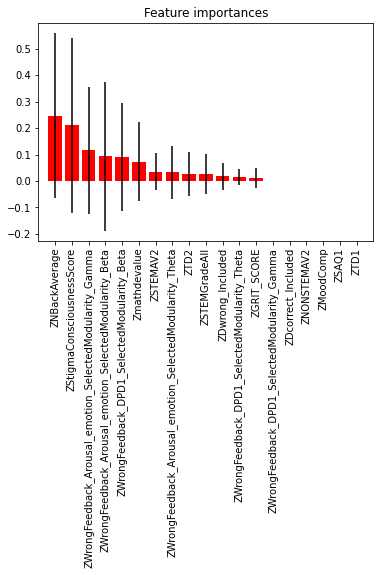

In [ ]:

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, np.array(features)[indices][f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()